### Imports and setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/flipkart_cleaned.csv")

sns.set_theme(style="whitegrid")

## Retail Price Distribution

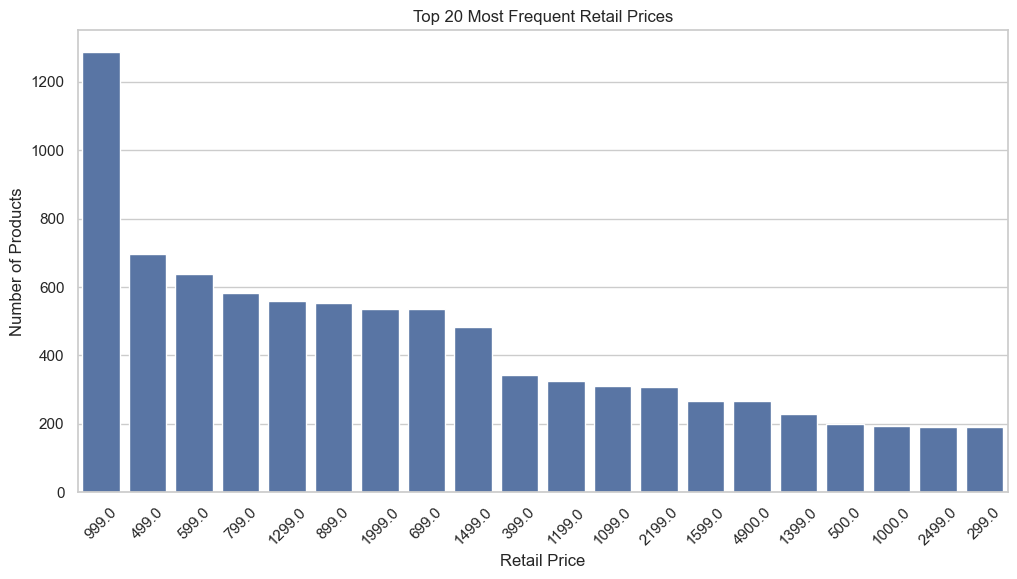

In [46]:
top_prices = df['retail_price'].value_counts().head(20).reset_index()
top_prices.columns = ["retail_price", 'count']

top_prices_df = top_prices.sort_values(ascending=False, by="count")

plt.figure(figsize=(12, 6))
sns.barplot(x='retail_price', y='count', data=top_prices_df, order=top_prices_df['retail_price'])
plt.title("Top 20 Most Frequent Retail Prices")
plt.xlabel("Retail Price")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

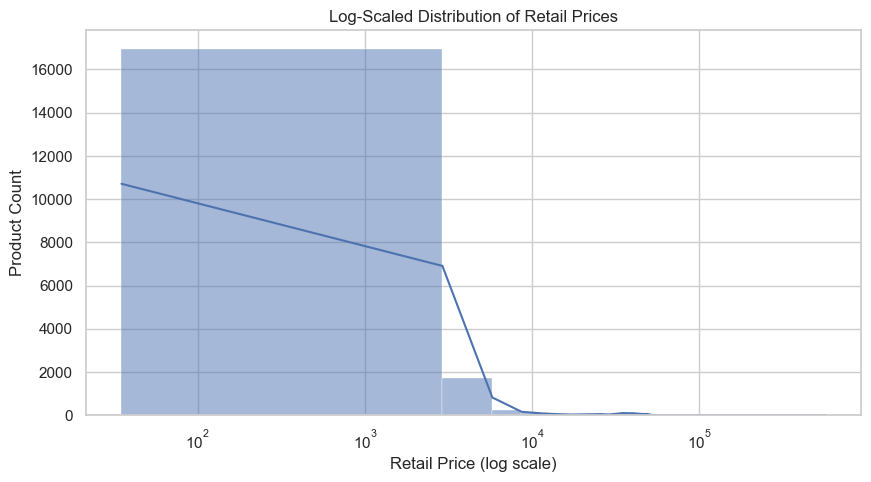

In [50]:
plt.figure(figsize=(10, 5))
sns.histplot(df['retail_price'], bins=200, kde=True)
plt.xscale('log')
plt.title("Log-Scaled Distribution of Retail Prices")
plt.xlabel("Retail Price (log scale)")
plt.ylabel("Product Count")
plt.show()

## Discount % Analysis

In [52]:
df['discount_percent'] = ((df['retail_price'] - df['discounted_price']) / df['retail_price']) * 100
df['discount_percent'].describe()

count    19917.000000
mean        40.529233
std         23.544764
min          0.000000
25%         21.099084
50%         45.000000
75%         59.973316
max         96.533333
Name: discount_percent, dtype: float64

### Discount Percent Distribution

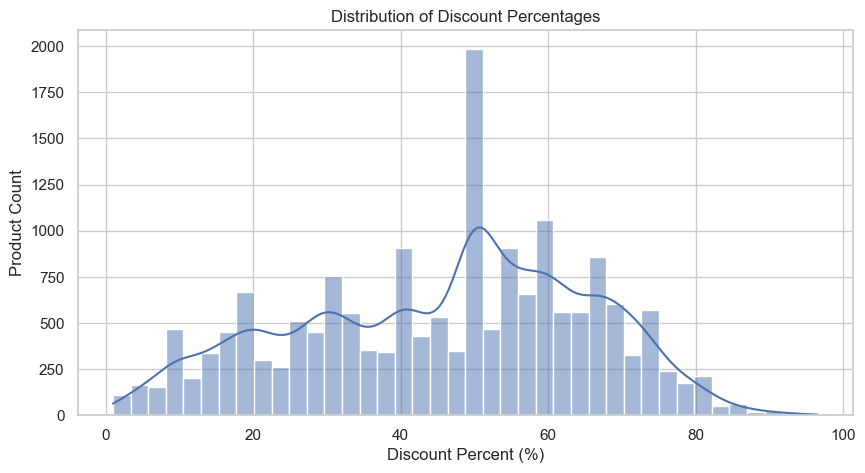

In [55]:
discounted_df = df[df['discount_percent'] > 0]

plt.figure(figsize=(10, 5))
sns.histplot(discounted_df['discount_percent'], bins=40, kde=True)
plt.title("Distribution of Discount Percentages")
plt.xlabel("Discount Percent (%)")
plt.ylabel("Product Count")
plt.show()

### Top Brands by Average Discount

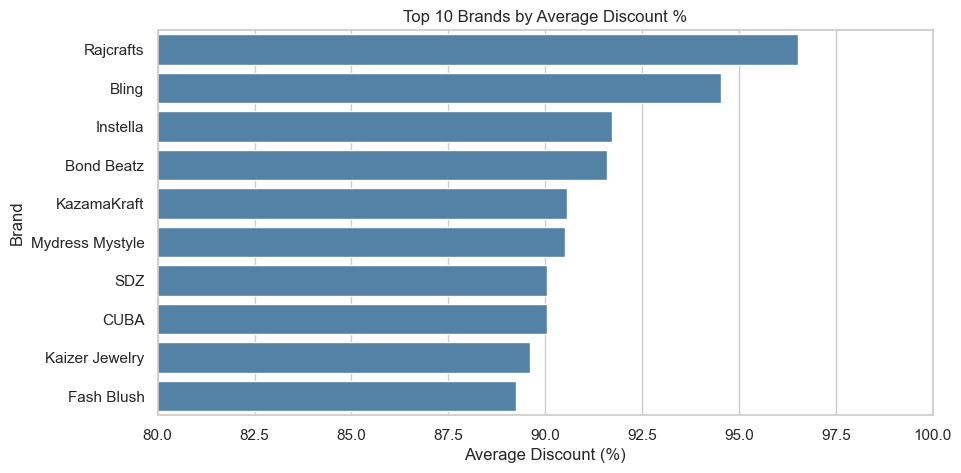

In [57]:
top_discount_brands = (
    discounted_df.groupby('brand')['discount_percent']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_discount_brands.values, y=top_discount_brands.index, color='steelblue')
plt.title("Top 10 Brands by Average Discount %")
plt.xlabel("Average Discount (%)")
plt.xlim(80, 100)
plt.ylabel("Brand")
plt.show()

### Extreme Discounts

In [62]:
df[df['discount_percent'] > 90].sort_values(by='discount_percent', ascending=False).head(5).iloc[:, [3, 4, 6, 7, 8, 10, 13, 15]]

,product_name,product_category_tree,retail_price,discounted_price,image,description,brand,discount_percent
17127,Rajcrafts Floral Double Quilts & Comforters White,"[""Home Furnishing >> Bed Linen >> Blankets, Qu...",6000.0,208.0,"[""http://img5a.flixcart.com/image/blanket/4/j/...",Rajcrafts Floral Double Quilts & Comforters Wh...,Rajcrafts,96.533333
7265,FashBlush Forever New Orange Bead & Chain Allo...,"[""Jewellery >> Necklaces & Chains >> Necklaces""]",3999.0,189.0,"[""http://img6a.flixcart.com/image/necklace-cha...",FashBlush Forever New Orange Bead & Chain Allo...,FashBlush,95.273818
6549,FashBlush Forever Beautiful White Bead Alloy N...,"[""Jewellery >> Necklaces & Chains >> Necklaces""]",3499.0,189.0,"[""http://img5a.flixcart.com/image/necklace-cha...",FashBlush Forever Beautiful White Bead Alloy N...,FashBlush,94.598457
10899,Bling Book Case for iPad 2 / 3,"[""Mobiles & Accessories >> Tablet Accessories ...",1816.0,99.0,"[""http://img6a.flixcart.com/image/cases-covers...",Buy Bling Book Case for iPad 2 / 3 only for Rs...,Bling,94.548458
6351,FashBlush Forever New BlackBead & LongChain Al...,"[""Jewellery >> Necklaces & Chains >> Necklaces""]",4999.0,279.0,"[""http://img6a.flixcart.com/image/necklace-cha...",FashBlush Forever New BlackBead & LongChain Al...,FashBlush,94.418884


## Price Range Buckets

### Creating a Price Range Column

In [73]:
def price_range_bucket(p):
    if p < 500:
        return '< 500'
    elif p < 1000:
        return '500-999'
    else:
        return '1000+'

df['price_range'] = df['discounted_price'].apply(price_range_bucket)
df['price_range'].value_counts()

price_range
< 500      9384
500-999    5607
1000+      4926
Name: count, dtype: int64

### Count of Products in Each Bucket

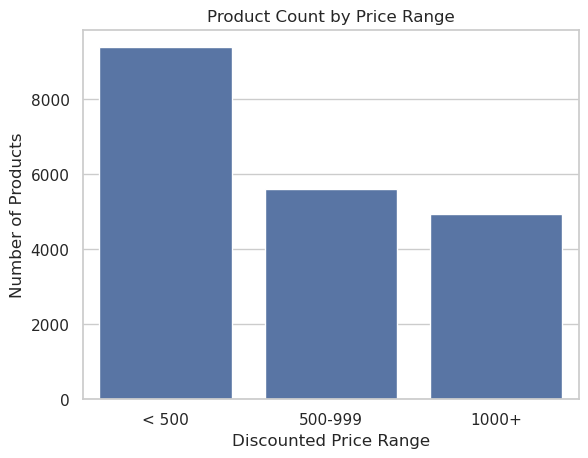

In [74]:
sns.countplot(data=df, x='price_range', order=['< 500', '500-999', '1000+'])
plt.title("Product Count by Price Range")
plt.xlabel("Discounted Price Range")
plt.ylabel("Number of Products")
plt.show()

### Average Discount % by Price Range

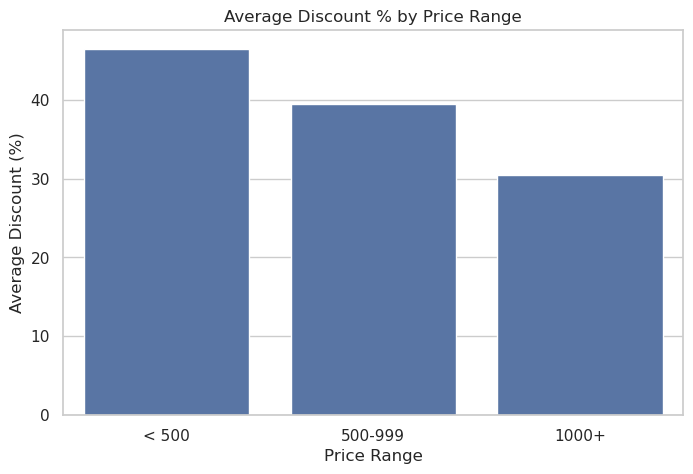

In [76]:
avg_discount_by_range = (
    df.groupby('price_range')['discount_percent']
    .mean()
    .reindex(['< 500', '500-999', '1000+'])
)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_discount_by_range.index, y=avg_discount_by_range.values)
plt.title("Average Discount % by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Discount (%)")
plt.show()